In [21]:
# %matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

from collections import defaultdict
from scipy.stats.stats import pearsonr
#LINK UTILE (https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)

In [22]:
df=pd.read_csv("credit.csv")
df.head(10)  #ogni volta che manca credit score manca anche annual income, ma i dati sono correlati negativamente

#forse possiamo trovare una relazione con il pattern mining
#transformation refers to the replacement of a variable by a function. 
#For instance, replacing a variable x by the square / cube root or logarithm x is a transformation. 
#QUindi si deve normalizzare"""

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


# ***Data semantics and assessing data quality***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [5]:
df.head(1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0


In [15]:
df_continui= df.copy()
df_continui.drop(df_continui.columns[[0,1,2,4,5,7,8,9,12,13,14,17,18]], axis="columns",  inplace=True) 
df_continui.head()

,Current Loan Amount,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance,Maximum Open Credit
0,445412.0,1167493.0,5214.74,17.2,228190.0,416746.0
1,262328.0,NaN,33295.98,21.1,229976.0,850784.0
2,99999999.0,2231892.0,29200.53,14.9,297996.0,750090.0
3,347666.0,806949.0,8741.90,12.0,256329.0,386958.0
4,176220.0,NaN,20639.70,6.1,253460.0,427174.0


In [16]:
df_continui.describe()

,Current Loan Amount,Annual Income,Monthly Debt,Years of Credit History,Current Credit Balance,Maximum Open Credit
count,1.000000e+05,8.084600e+04,100000.000000,100000.000000,1.000000e+05,9.999800e+04
mean,1.176045e+07,1.378277e+06,18472.412336,18.199141,2.946374e+05,7.607984e+05
std,3.178394e+07,1.081360e+06,12174.992609,7.015324,3.761709e+05,8.384503e+06
min,1.080200e+04,7.662700e+04,0.000000,3.600000,0.000000e+00,0.000000e+00
25%,1.796520e+05,8.488440e+05,10214.162500,13.500000,1.126700e+05,2.734380e+05
50%,3.122460e+05,1.174162e+06,16220.300000,16.900000,2.098170e+05,4.678740e+05
75%,5.249420e+05,1.650663e+06,24012.057500,21.700000,3.679588e+05,7.829580e+05
max,1.000000e+08,1.655574e+08,435843.280000,70.500000,3.287897e+07,1.539738e+09


In [13]:
df.head(1)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0


In [24]:
df_int= df.copy()
df_int.drop(df.columns[[0,1,2,3,4,6,7,8,9,10,11,15,16]], axis="columns",  inplace=True) 
df_int.describe()

,Credit Score,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Bankruptcies,Tax Liens
count,80846.000000,46859.000000,100000.00000,100000.000000,99796.000000,99990.000000
mean,1076.456089,34.901321,11.12853,0.168310,0.117740,0.029313
std,1475.403791,21.997829,5.00987,0.482705,0.351424,0.258182
min,585.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,705.000000,16.000000,8.00000,0.000000,0.000000,0.000000
50%,724.000000,32.000000,10.00000,0.000000,0.000000,0.000000
75%,741.000000,51.000000,14.00000,0.000000,0.000000,0.000000
max,7510.000000,176.000000,76.00000,15.000000,7.000000,15.000000


In [18]:
df['Months since last delinquent'].unique()

array([ nan,   8.,  29.,  10.,  33.,  76.,  25.,  46.,  34.,  53.,  30.,
        32.,  21.,  50.,  20.,  24.,  15.,   6.,  13.,  48.,  69.,  42.,
        35.,   7.,  27.,   5.,  26.,  17.,  72.,  65.,   4.,  11.,  54.,
        31.,  19.,  41.,  73.,  60.,  77.,  18.,   9.,  80.,  70.,  38.,
        47.,  82.,  74.,   0.,  16.,  75.,  61.,  79.,  62.,  56.,  64.,
        36.,  39.,  59.,  55.,  37.,  58.,  68.,  22.,  45.,  14.,  51.,
        49.,   1.,  81.,  63.,  71.,  43.,  40.,  12.,  52.,   3.,  66.,
        23.,  57.,  78.,  44.,   2.,  28.,  88.,  67.,  85.,  89., 118.,
        83., 152., 120.,  92.,  86.,  94., 110.,  93.,  97.,  84., 130.,
       129., 106.,  90., 107., 176., 108.,  87., 139., 143., 114.,  91.,
       104., 115., 100., 148., 141.,  96., 131.])

In [6]:
df.isnull().any()

Loan ID                         True
Customer ID                     True
Loan Status                     True
Current Loan Amount             True
Term                            True
Credit Score                    True
Annual Income                   True
Years in current job            True
Home Ownership                  True
Purpose                         True
Monthly Debt                    True
Years of Credit History         True
Months since last delinquent    True
Number of Open Accounts         True
Number of Credit Problems       True
Current Credit Balance          True
Maximum Open Credit             True
Bankruptcies                    True
Tax Liens                       True
dtype: bool

In [7]:
df.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [8]:
df.shape

(100514, 19)

In [9]:
#df["Loan Status"].unique()
#df["Term"].unique()
#df["Number of Credit Problems"].unique()
#df["Home Ownership"].unique()
#df["Annual Income"].unique()
#df["Number of Credit Problems"].unique() #questi valori risultano float ma sono interi come tutti gli altri interi
#df["Bankruptcies"].unique()
df["Tax Liens"].unique()
#df["Years in current job"].unique()
#df["Months since last delinquent"].unique()
#df["Number of Open Accounts"].unique()

array([ 0.,  1.,  2.,  4.,  3.,  6.,  5., nan, 11., 15.,  9.,  7., 10.])

In [10]:
df["Purpose"].unique() #apparte due volte il termine other, si deve sostituire
purpose=df["Purpose"].replace("other", "Other")  #sostituito
purpose.unique()
df["Purpose"]=purpose
df["Purpose"].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'Other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy', nan],
      dtype=object)

In [11]:
Ownership= df["Home Ownership"].replace ("HaveMortgage", "Home Mortgage")
Ownership.unique()
df["Home Ownership"]= Ownership
df["Home Ownership"].unique() #appare due volte Mortgage, quindi è stato sostituito cHave mortgage con home mortgage

array(['Home Mortgage', 'Own Home', 'Rent', nan], dtype=object)

In [12]:
df[df["Monthly Debt"]==0].head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1985,da795dc7-9960-49d9-9ef4-94a28a51f168,cc4bd6b1-d485-4bad-ad6b-f856fa20f2d1,Fully Paid,388168.0,Short Term,693.0,1042929.0,2 years,Own Home,Business Loan,0.0,19.8,NaN,2.0,0.0,0.0,0.0,0.0,0.0
3498,a3a73c37-e371-42bf-ade8-84f7c7adbc63,71e9e730-7945-4908-9b47-f071b299b580,Fully Paid,327954.0,Short Term,739.0,548340.0,2 years,Rent,Home Improvements,0.0,10.6,NaN,4.0,0.0,0.0,0.0,0.0,0.0
3917,594bcdde-72d2-42ef-b457-aae4f45155d3,168376bb-6315-4d60-92e3-746751f63e50,Fully Paid,99999999.0,Short Term,748.0,1254513.0,10+ years,Rent,Take a Trip,0.0,23.4,60.0,6.0,0.0,0.0,0.0,0.0,0.0
5501,ed3e844d-9f10-4a15-9152-24320a0c8480,22d32059-acdf-4075-82ba-d6c7fdac4e65,Charged Off,106854.0,Short Term,738.0,288401.0,1 year,Rent,Debt Consolidation,0.0,11.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0
7573,ec2aabb1-fd0d-4770-b638-72509c189dc8,c21ae1b5-6b7c-4453-bb41-90c3617fb60a,Fully Paid,171226.0,Short Term,689.0,1824494.0,6 years,Home Mortgage,Home Improvements,0.0,10.5,NaN,3.0,1.0,0.0,0.0,1.0,0.0
7724,34cce5c5-1f67-4926-a864-74210dee48b6,ff2166e3-3bbf-4acf-8208-483a5410821f,Fully Paid,229834.0,Short Term,745.0,1654083.0,1 year,Rent,Buy House,0.0,17.5,NaN,5.0,0.0,125970.0,1257344.0,0.0,0.0
8050,6eb14cde-2de6-48df-a6dc-72527642d105,260c52a3-46b8-4cdc-89e7-352960557344,Fully Paid,49478.0,Short Term,714.0,364819.0,< 1 year,Rent,Take a Trip,0.0,29.6,62.0,8.0,0.0,0.0,0.0,0.0,0.0
9708,6c9ed2b3-f215-47ba-8837-b14bbdc7bb10,f9f03a68-2459-4fdf-af10-1392b03473c4,Fully Paid,108966.0,Short Term,747.0,225853.0,NaN,Rent,Buy a Car,0.0,14.0,NaN,3.0,0.0,0.0,0.0,0.0,0.0
9890,bbc51c4c-0df3-41af-aef6-12f21fd9487f,8b16997a-afbe-491a-8b7d-cd47df6cfb14,Fully Paid,343684.0,Long Term,740.0,1157613.0,6 years,Home Mortgage,Home Improvements,0.0,20.5,NaN,4.0,0.0,0.0,0.0,0.0,0.0
10740,d5305fe8-6658-4dd5-9327-caa3238c354a,261a582c-18d4-455c-af2e-8f84b059364a,Fully Paid,75350.0,Short Term,704.0,867749.0,10+ years,Home Mortgage,Home Improvements,0.0,16.5,66.0,2.0,0.0,0.0,0.0,0.0,0.0


In [20]:
pclass_xt = pd.crosstab(df_srm['Monthly Debt']==0, df_srm['Loan Status']) #non ci sono casi in cui Current Loan AMount è 0.
pclass_xt                                                                  #ci sono solo 57 casi in cui Monthly debt=0 e Loan status=FUlly paid.

Loan Status,Charged Off,Fully Paid
Monthly Debt,,
False,22622,77304
True,17,57


In [21]:
pclass_xt = pd.crosstab(df_srm['Current Loan Amount']==0, df_srm['Loan Status']) #non ci sono casi in cui Current Loan AMount è 0.
pclass_xt 

Loan Status,Charged Off,Fully Paid
Current Loan Amount,,
False,22639,77361


# ***Correlazioni***

In [33]:
df.corr(method="pearson") #bancarotta e problemi di credito strettamente correlato anche tax liens e problemi di credito
#df.corr(method="kendall") #monthlydebt e income leggermente correlati #uguale alla prima
#df.corr(method="spearman")

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.096652,0.013112,-0.006643,0.019282,0.011248,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048
Credit Score,-0.096652,1.000000,-0.017078,-0.001674,-0.009720,-0.003739,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146
Annual Income,0.013112,-0.017078,1.000000,0.485230,0.161669,-0.077577,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167
Monthly Debt,-0.006643,-0.001674,0.485230,1.000000,0.199289,-0.056818,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119
Years of Credit History,0.019282,-0.009720,0.161669,0.199289,1.000000,-0.044292,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245
Months since last delinquent,0.011248,-0.003739,-0.077577,-0.056818,-0.044292,1.000000,-0.032569,0.104642,-0.028662,-0.008785,0.123951,0.012624
Number of Open Accounts,0.001478,0.006435,0.146175,0.411353,0.132349,-0.032569,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545
Number of Credit Problems,-0.002795,-0.003022,-0.017006,-0.055383,0.061588,0.104642,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290
Current Credit Balance,0.003880,-0.000104,0.312340,0.481348,0.208470,-0.028662,0.228136,-0.112516,1.000000,0.139204,-0.122603,-0.015645
Maximum Open Credit,-0.001271,-0.002827,0.053064,0.039268,0.031124,-0.008785,0.031341,-0.012072,0.139204,1.000000,-0.014574,-0.001029


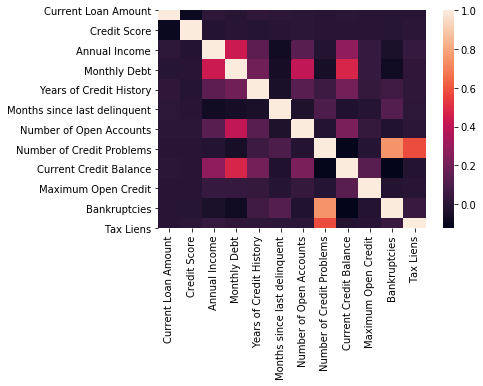

In [34]:
import seaborn as sns
corr=df_srm.corr()
sns.heatmap(df_srm.corr())

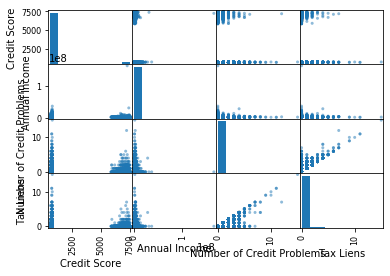

In [35]:
pd.plotting.scatter_matrix(df[['Credit Score', 'Annual Income', 'Number of Credit Problems', 'Tax Liens']])
plt.show() 

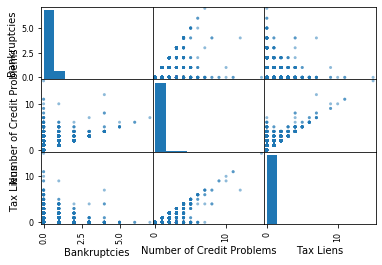

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text yticklabel objects>)

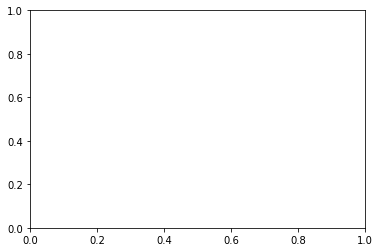

In [36]:
pd.plotting.scatter_matrix(df[['Bankruptcies', 'Number of Credit Problems', 'Tax Liens']])
#plt.yticks(rotation=0)
plt.show() #gian: ho messo anche bancarotta perche ha la correlazione maggiore con number of credit problems
          # non so sistemare le label sovrapposte a sx
plt.yticks(rotation=0)

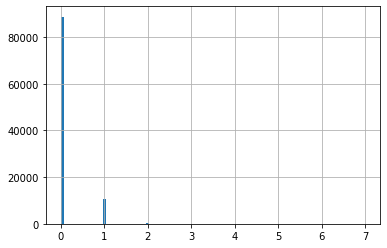

0.0    88774
1.0    10475
2.0      417
3.0       93
4.0       27
5.0        7
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64

In [37]:
df['Bankruptcies'].hist(bins=100)
plt.show()
df['Bankruptcies'].value_counts()

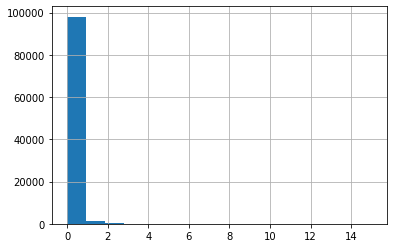

0.0     98062
1.0      1343
2.0       374
3.0       111
4.0        58
5.0        16
6.0        12
7.0         7
9.0         3
11.0        2
15.0        1
10.0        1
Name: Tax Liens, dtype: int64

In [38]:
df['Tax Liens'].hist(bins=16)
plt.show()
df['Tax Liens'].value_counts()

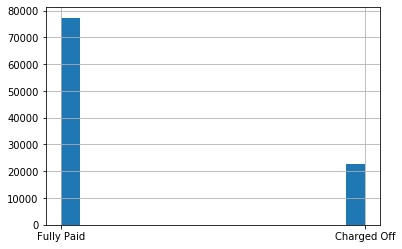

In [39]:
df['Loan Status'].hist(bins=16)
plt.show()

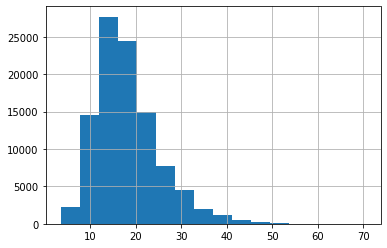

16.0    1340
15.0    1305
17.0    1219
16.5    1176
14.0    1151
        ... 
59.9       1
51.4       1
58.0       1
53.8       1
52.2       1
Name: Years of Credit History, Length: 506, dtype: int64

In [40]:
df['Years of Credit History'].hist(bins=16)    #k = [log2(n)+1] (n=sample size)
plt.show()
df['Years of Credit History'].value_counts()

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000.]),
 <a list of 6 Text yticklabel objects>)

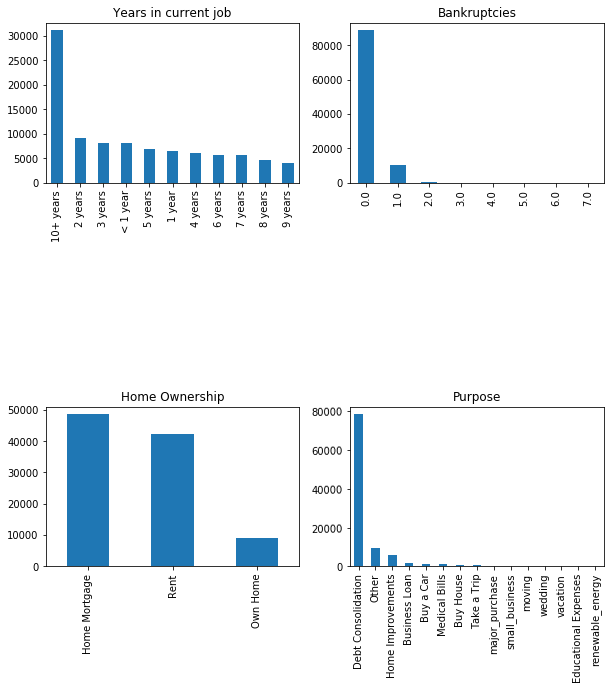

In [43]:
fig = plt.figure(figsize=(10, 10)) 
fig_dims = (3, 2)
plt.subplot2grid(fig_dims, (0, 0))
df['Years in current job'].value_counts().plot(kind='bar', 
                                   title='Years in current job')

plt.subplot2grid(fig_dims, (0,1))
df['Bankruptcies'].value_counts().plot(kind='bar', title='Bankruptcies')

plt.subplot2grid(fig_dims, (2,0))
df['Home Ownership'].value_counts().plot(kind='bar', title='Home Ownership')
#possibile correlazione tra home ownership e purpose
#years in current job e bancarotte da tranquillità

plt.subplot2grid(fig_dims, (2, 1))
df['Purpose'].value_counts().plot(kind='bar', title='Purpose')
plt.yticks(rotation=1)



In [44]:
df["Years in current job"].value_counts()

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

In [45]:
df_srm["Purpose"].value_counts()

Debt Consolidation      78552
Other                    9287
Home Improvements        5839
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

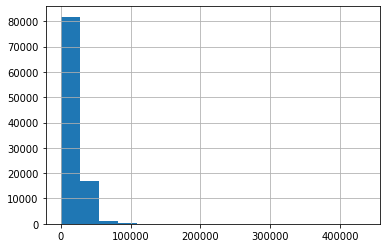

0.00        74
15903.00     9
11162.88     9
16279.20     8
12656.47     8
            ..
8573.56      1
26028.29     1
17368.85     1
23404.58     1
30723.00     1
Name: Monthly Debt, Length: 65765, dtype: int64

In [46]:
df['Monthly Debt'].hist(bins=16)
plt.show()
df['Monthly Debt'].value_counts() #strano che debito mensile sia 0

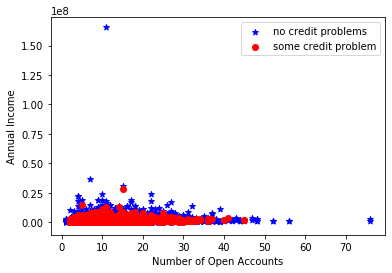

In [47]:
plt.scatter(df[df['Number of Credit Problems'] == 0]['Number of Open Accounts'], 
            df[df['Number of Credit Problems'] == 0]['Annual Income'], color='b', marker='*', label='no credit problems')
plt.scatter(df[df['Number of Credit Problems'] >= 1]['Number of Open Accounts'], 
            df[df['Number of Credit Problems'] >= 1]['Annual Income'], color='r',label='some credit problem')
plt.xlabel('Number of Open Accounts')
plt.ylabel('Annual Income')
plt.legend()
plt.show()
#si può notare che sicuramente chi non ha mai avuto problemi di credito ha un alto reddito o ha avuto più accesso al credito

# ***Sostituzione dei Missing Values***

In [16]:
df["Loan Status"].describe()

count         100000
unique             2
top       Fully Paid
freq           77361
Name: Loan Status, dtype: object

In [17]:
df['Loan Status'].unique()

array(['Fully Paid', 'Charged Off', nan], dtype=object)

In [18]:
missing_Loanstatus.describe()

NameError: name 'missing_Loanstatus' is not defined

In [19]:
df_srm=df.dropna(axis=0, how='all') #srm=senza righe mancanti;
df_srm.isnull().sum()
                                                            #DIREI DI ELIMINARE MONTHS SINCE LAST DELINQUENT visto che ne mancano la metà e vedere cosa
                                                            #fare con CREDIT SCORE E ANNUAL INCOME PERCHE' è strano che ne manchino in eguale quantità.
                                                            #il credit score dipende dal rapporto fra reddito e debito, quindi è possibile che l'assenza 
                                                            #dipende da questo

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [22]:
df_srm['Maximum Open Credit'] = df_srm['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mode()[0])
print(df_srm["Tax Liens"].describe())

count    99990.000000
mean         0.029313
std          0.258182
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: Tax Liens, dtype: float64


C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_srm.shape

(100000, 19)

In [24]:
df_srm['Tax Liens'].unique()

array([ 0.,  1.,  2.,  4.,  3.,  6.,  5., nan, 11., 15.,  9.,  7., 10.])

In [25]:
#Missing_Taxliens=df_srm["Tax Liens"].dropna()
#print(Missing_Taxliens.describe()) #sembra ci siano outliers
#df_srm.loc["Tax Liens"]=df_srm.loc["Tax Liens"].fillna(df_srm["Tax Liens"].mean()) gian ho sostituito ai m.v la moda perche tax liens in realta sono solo interi
df_srm['Tax Liens'] = df_srm['Tax Liens'].fillna(df['Tax Liens'].mode()[0])
print(df_srm["Tax Liens"].describe()) #non cambia mai niente 

count    100000.00000
mean          0.02931
std           0.25817
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max          15.00000
Name: Tax Liens, dtype: float64


C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
#Missing_bankruptcies=df_srm["Bankruptcies"].dropna() #visto che la media di bancarotta è 0,1, potremmo sostituirla con 0, perché se il valore manca
                                                     #può essere perché non c'è stata bancarotta. gian :0 è anche la moda
#df_srm["Bankruptcies"]=df_srm["Bankruptcies"].fillna(0)
df_srm['Bankruptcies'] = df_srm['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])
print(df_srm["Bankruptcies"].describe()) 

count    100000.000000
mean          0.117500
std           0.351105
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           7.000000
Name: Bankruptcies, dtype: float64


C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [27]:
#Missing_Years=df_srm["Years in current job"].dropna()
#print(Missing_Years.describe()) #è categorico 
#Sostituiti_Years=df_srm["Years in current job"].fillna(method="ffill")
#print(Sostituiti_Years.describe())
#df_srm["Years in current job"].mode()
#df_srm["Years in current job"]=df_srm["Years in current job"].fillna("10+ years")
df_srm['Years in current job'] = df_srm['Years in current job'].fillna(df['Years in current job'].mode()[0])
print(df_srm["Years in current job"].describe())

count        100000
unique           11
top       10+ years
freq          35343
Name: Years in current job, dtype: object


C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [28]:
df_srm['Annual Income'].describe()

count    8.084600e+04
mean     1.378277e+06
std      1.081360e+06
min      7.662700e+04
25%      8.488440e+05
50%      1.174162e+06
75%      1.650663e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

In [29]:
df_srm['Credit Score']=df_srm['Credit Score'].fillna(df['Credit Score'].mean())
print(df_srm['Credit Score'].describe())

count    100000.000000
mean       1076.456089
std        1326.598950
min         585.000000
25%         711.000000
50%         733.000000
75%         750.000000
max        7510.000000
Name: Credit Score, dtype: float64


C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_srm['Annual Income']=df_srm['Annual Income'].fillna(df['Annual Income'].mean())
print(df_srm['Annual Income'].describe())

count    1.000000e+05
mean     1.378277e+06
std      9.722974e+05
min      7.662700e+04
25%      9.311805e+05
50%      1.369919e+06
75%      1.512704e+06
max      1.655574e+08
Name: Annual Income, dtype: float64


C:\Users\Gianmarco\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
df_srm.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.00000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607832e+05,0.117500,0.02931
std,3.178394e+07,1326.598950,9.722974e+05,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384420e+06,0.351105,0.25817
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.00000
25%,1.796520e+05,711.000000,9.311805e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734325e+05,0.000000,0.00000
50%,3.122460e+05,733.000000,1.369919e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.00000
75%,5.249420e+05,750.000000,1.512704e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.00000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.00000


In [32]:
df_srm.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Annual Income                       0
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

In [34]:
df_srm.to_csv (r'C:\Users\Gianmarco\Desktop\export_dataframe.csv', index = False, header=True)

# ***Encoding variabili categoriche***

In [48]:
df_srm['Loan Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [49]:
Loanstatus_numerico = sorted(df_srm['Loan Status'].unique()) 
mapping_Loanstatus = dict(zip(Loanstatus_numerico, range(0, len(Loanstatus_numerico) + 1)))
mapping_Loanstatus 


{'Charged Off': 0, 'Fully Paid': 1}

In [51]:
#from google.colab import drive
#drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [52]:
df_srm['Loan_val'] = df_srm['Loan Status'].map(mapping_Loanstatus).astype(int)
df_srm[['Loan Status', 'Loan_val']].head()

C:\Users\Gianmarco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Loan Status,Loan_val
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Fully Paid,1


In [53]:
df_srm['Term'] = df['Term'].fillna(df['Term'].mode()[0])

C:\Users\Gianmarco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
df_srm['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [55]:
Term_loc = sorted(df_srm["Term"].unique())
mapping_Term_Numerico = dict(zip(Term_loc, range(0, len(Term_loc)+1)))
mapping_Term_Numerico

{'Long Term': 0, 'Short Term': 1}

In [56]:
df_srm['Term_loc'] = df_srm['Term'].map(mapping_Term_Numerico).astype(int)
df_srm[['Term', 'Term_loc']].head()

C:\Users\Gianmarco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Term,Term_loc
0,Short Term,1
1,Short Term,1
2,Short Term,1
3,Long Term,0
4,Short Term,1


In [57]:
df_srm['Home Ownership'] = df['Home Ownership'].fillna(df['Home Ownership'].mode()[0])

C:\Users\Gianmarco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
Ownership_loc= sorted(df_srm["Home Ownership"].unique())
mapping_Ownership = dict(zip(Ownership_loc, range(0, len(Ownership_loc)+1)))
mapping_Ownership


{'Home Mortgage': 0, 'Own Home': 1, 'Rent': 2}

In [59]:
df_srm['Ownership_val'] = df_srm['Home Ownership'].map(mapping_Ownership).astype(int)
df_srm[['Home Ownership', 'Ownership_val']].head()

C:\Users\Gianmarco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Home Ownership,Ownership_val
0,Home Mortgage,0
1,Home Mortgage,0
2,Own Home,1
3,Own Home,1
4,Rent,2


In [60]:
df['Purpose'] = df['Purpose'].fillna(df['Purpose'].mode()[0])

In [61]:
df_srm['Purpose'].unique()

array(['Home Improvements', 'Debt Consolidation', 'Buy House', 'Other',
       'Business Loan', 'Buy a Car', 'major_purchase', 'Take a Trip',
       'small_business', 'Medical Bills', 'wedding', 'vacation',
       'Educational Expenses', 'moving', 'renewable_energy'], dtype=object)

In [62]:
Purpose_loc= sorted(df_srm["Purpose"].unique())
mapping_Purpose= dict(zip(Purpose_loc, range(0, len(Purpose_loc)+1)))
mapping_Purpose

{'Business Loan': 0,
 'Buy House': 1,
 'Buy a Car': 2,
 'Debt Consolidation': 3,
 'Educational Expenses': 4,
 'Home Improvements': 5,
 'Medical Bills': 6,
 'Other': 7,
 'Take a Trip': 8,
 'major_purchase': 9,
 'moving': 10,
 'renewable_energy': 11,
 'small_business': 12,
 'vacation': 13,
 'wedding': 14}

In [63]:
df_srm['Purpose_val'] = df_srm['Purpose'].map(mapping_Purpose).astype(int)
df_srm[['Purpose', 'Purpose_val']].head()

C:\Users\Gianmarco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Purpose,Purpose_val
0,Home Improvements,5
1,Debt Consolidation,3
2,Debt Consolidation,3
3,Debt Consolidation,3
4,Debt Consolidation,3


In [64]:
Job_loc= (df_srm["Years in current job"].unique()) #sorted
Job_numerico= dict(zip(Job_loc, range(0, len(Job_loc)+1)))
Job_numerico

{'8 years': 0,
 '10+ years': 1,
 '3 years': 2,
 '5 years': 3,
 '< 1 year': 4,
 '2 years': 5,
 '4 years': 6,
 '9 years': 7,
 '7 years': 8,
 '1 year': 9,
 '6 years': 10}

In [65]:
df_srm['Job_val'] = df_srm['Years in current job'].map(Job_numerico).astype(int)
df_srm[['Years in current job', 'Job_val']].head()

C:\Users\Gianmarco\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Years in current job,Job_val
0,8 years,0
1,10+ years,1
2,8 years,0
3,3 years,2
4,5 years,3


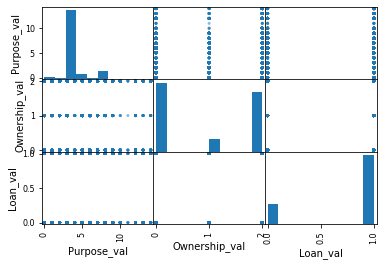

In [66]:

pd.plotting.scatter_matrix(df_srm[['Purpose_val', 'Ownership_val', 'Loan_val']])
plt.show()  #vorrei vedere la correlazione fra questi nuovi attributi ma non riesco

In [67]:
df_srm[df_srm['Monthly Debt'] == 0]['Loan Status'].head()

1985     Fully Paid
3498     Fully Paid
3917     Fully Paid
5501    Charged Off
7573     Fully Paid
Name: Loan Status, dtype: object

# **Handling** **Outliers**

In [0]:
#ci sono outliers ovunque!!!!!!! #fra i vari modi per sostituirli ci sono: eliminazione,traformazione delle variabili(Normalizzare con natural log o binning)

In [68]:
df_srm["Number of Open Accounts"].value_counts() #siccome ci sono outliers dal 40 in poi li comprimiamo e usiamo la media.

9.0     9360
10.0    9012
8.0     8792
11.0    8601
7.0     8090
12.0    7461
6.0     6731
13.0    6280
14.0    5194
5.0     4742
15.0    4268
16.0    3502
17.0    2857
4.0     2849
18.0    2222
19.0    1883
20.0    1423
3.0     1364
21.0    1104
22.0     828
23.0     679
24.0     550
2.0      448
25.0     418
26.0     274
27.0     270
28.0     162
29.0     125
30.0     109
31.0      76
32.0      64
33.0      56
34.0      41
36.0      25
1.0       25
35.0      21
37.0      16
38.0      13
43.0      10
40.0       9
39.0       8
41.0       7
45.0       6
42.0       5
44.0       5
48.0       4
47.0       3
56.0       2
52.0       2
0.0        2
76.0       2
Name: Number of Open Accounts, dtype: int64

In [69]:
df_srm["Current Loan Amount"].value_counts()

99999999.0    11484
223322.0         27
223102.0         27
223652.0         27
216194.0         27
              ...  
602008.0          1
457864.0          1
601986.0          1
95216.0           1
114686.0          1
Name: Current Loan Amount, Length: 22004, dtype: int64

## **Distribuzione delle variabili**

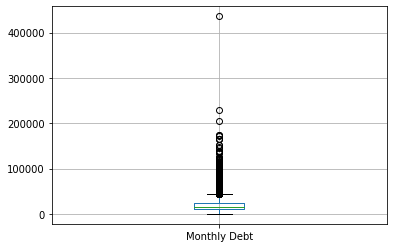

In [31]:
boxplot = df_srm.boxplot(column=['Monthly Debt'])

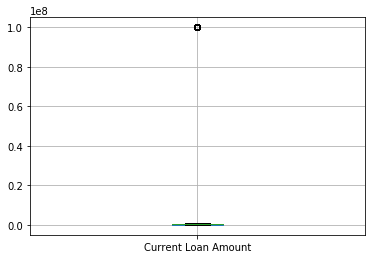

In [32]:
boxplot = df_srm.boxplot(column=['Current Loan Amount']) #???

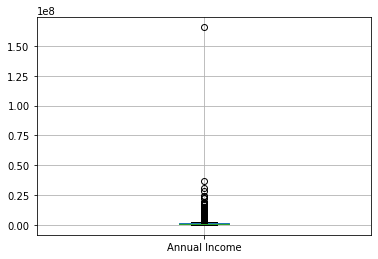

In [33]:
boxplot = df_srm.boxplot(column=['Annual Income'])

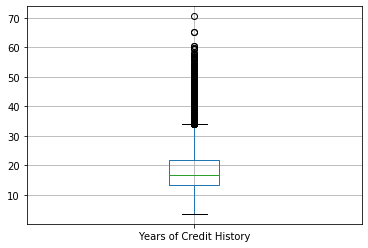

In [34]:
boxplot = df_srm.boxplot(column=['Years of Credit History'])

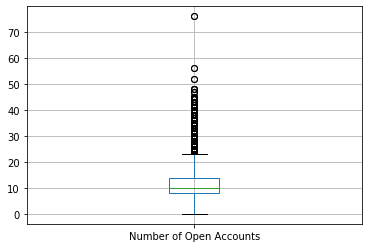

In [35]:
boxplot = df_srm.boxplot(column=['Number of Open Accounts'])

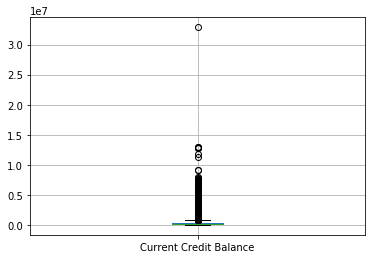

In [36]:
boxplot = df_srm.boxplot(column=['Current Credit Balance'])

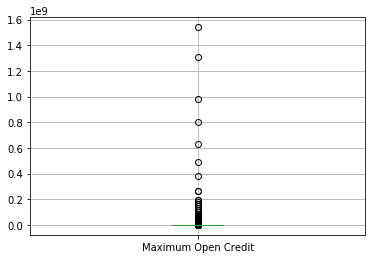

In [37]:
boxplot = df_srm.boxplot(column=['Maximum Open Credit'])

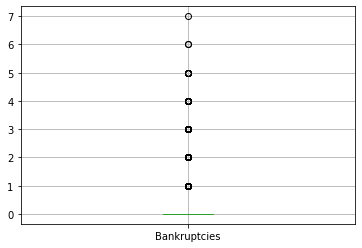

In [38]:
boxplot = df_srm.boxplot(column=['Bankruptcies'])

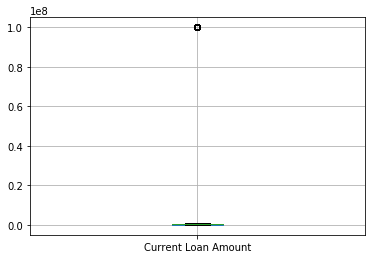

In [39]:
boxplot = df_srm.boxplot(column=['Current Loan Amount'])

# ***Creazione nuovo dataset***

In [131]:
df_srm.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,...,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_val,Term_loc,Ownership_val,Purpose_val,Job_val
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.000000,1.167493e+06,8 years,Home Mortgage,Home Improvements,...,1.0,228190.0,416746.0,1.0,0.0,1,1,0,5,0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,1076.456089,1.378277e+06,10+ years,Home Mortgage,Debt Consolidation,...,0.0,229976.0,850784.0,0.0,0.0,1,1,0,3,1
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.000000,2.231892e+06,8 years,Own Home,Debt Consolidation,...,1.0,297996.0,750090.0,0.0,0.0,1,1,1,3,0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.000000,8.069490e+05,3 years,Own Home,Debt Consolidation,...,0.0,256329.0,386958.0,0.0,0.0,1,0,1,3,2
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,1076.456089,1.378277e+06,5 years,Rent,Debt Consolidation,...,0.0,253460.0,427174.0,0.0,0.0,1,1,2,3,3


In [132]:
nuovo_df=df_srm.copy() #nel nuovo dataset ho tolto gli ID e la colonna Months since last delinquent e tutte le variabili categoriche.
nuovo_df.drop(df_srm.columns[[0,1,2,4,7,8,9,12,16,17,18,19,20]], axis="columns",  inplace=True) 


In [133]:
nuovo_df.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Ownership_val,Purpose_val,Job_val
0,445412.0,709.000000,1.167493e+06,5214.74,17.2,6.0,1.0,228190.0,0,5,0
1,262328.0,1076.456089,1.378277e+06,33295.98,21.1,35.0,0.0,229976.0,0,3,1
2,99999999.0,741.000000,2.231892e+06,29200.53,14.9,18.0,1.0,297996.0,1,3,0
3,347666.0,721.000000,8.069490e+05,8741.90,12.0,9.0,0.0,256329.0,1,3,2
4,176220.0,1076.456089,1.378277e+06,20639.70,6.1,15.0,0.0,253460.0,2,3,3


# **Normalizzazzione degli attributi**

In [134]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler #carico il modulo ScandardScaler da sklearn.

In [135]:
scaler = StandardScaler()
scaler.fit(nuovo_df.head().values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [136]:
nuovo_df.head().values

array([[4.45412000e+05, 7.09000000e+02, 1.16749300e+06, 5.21474000e+03,
        1.72000000e+01, 6.00000000e+00, 1.00000000e+00, 2.28190000e+05,
        0.00000000e+00, 5.00000000e+00, 0.00000000e+00],
       [2.62328000e+05, 1.07645609e+03, 1.37827656e+06, 3.32959800e+04,
        2.11000000e+01, 3.50000000e+01, 0.00000000e+00, 2.29976000e+05,
        0.00000000e+00, 3.00000000e+00, 1.00000000e+00],
       [9.99999990e+07, 7.41000000e+02, 2.23189200e+06, 2.92005300e+04,
        1.49000000e+01, 1.80000000e+01, 1.00000000e+00, 2.97996000e+05,
        1.00000000e+00, 3.00000000e+00, 0.00000000e+00],
       [3.47666000e+05, 7.21000000e+02, 8.06949000e+05, 8.74190000e+03,
        1.20000000e+01, 9.00000000e+00, 0.00000000e+00, 2.56329000e+05,
        1.00000000e+00, 3.00000000e+00, 2.00000000e+00],
       [1.76220000e+05, 1.07645609e+03, 1.37827656e+06, 2.06397000e+04,
        6.10000000e+00, 1.50000000e+01, 0.00000000e+00, 2.53460000e+05,
        2.00000000e+00, 3.00000000e+00, 3.00000000e+

In [137]:
scaler.transform(nuovo_df.head().values)

array([[-0.4965505 , -0.89978494, -0.48021315, -1.29072352,  0.58213371,
        -1.04627908,  1.22474487, -0.99110526, -1.06904497,  2.        ,
        -1.02899151],
       [-0.50114172,  1.22260745, -0.03051061,  1.26106124,  1.35435189,
         1.81618256, -0.81649658, -0.92030126, -1.06904497, -0.5       ,
        -0.17149859],
       [ 1.99999498, -0.7149559 ,  1.79066097,  0.8889015 ,  0.12672298,
         0.1381878 ,  1.22474487,  1.77627635,  0.26726124, -0.5       ,
        -1.02899151],
       [-0.49900169, -0.83047405, -1.2494266 , -0.97020515, -0.44749054,
        -0.75016236, -0.81649658,  0.12443425,  0.26726124, -0.5       ,
         0.68599434],
       [-0.50330107,  1.22260745, -0.03051061,  0.11096593, -1.61571805,
        -0.15792892, -0.81649658,  0.01069592,  1.60356745, -0.5       ,
         1.54348727]])

In [138]:
scaler.inverse_transform(scaler.transform(nuovo_df.head().values))

array([[4.45412000e+05, 7.09000000e+02, 1.16749300e+06, 5.21474000e+03,
        1.72000000e+01, 6.00000000e+00, 1.00000000e+00, 2.28190000e+05,
        0.00000000e+00, 5.00000000e+00, 0.00000000e+00],
       [2.62328000e+05, 1.07645609e+03, 1.37827656e+06, 3.32959800e+04,
        2.11000000e+01, 3.50000000e+01, 0.00000000e+00, 2.29976000e+05,
        0.00000000e+00, 3.00000000e+00, 1.00000000e+00],
       [9.99999990e+07, 7.41000000e+02, 2.23189200e+06, 2.92005300e+04,
        1.49000000e+01, 1.80000000e+01, 1.00000000e+00, 2.97996000e+05,
        1.00000000e+00, 3.00000000e+00, 0.00000000e+00],
       [3.47666000e+05, 7.21000000e+02, 8.06949000e+05, 8.74190000e+03,
        1.20000000e+01, 9.00000000e+00, 0.00000000e+00, 2.56329000e+05,
        1.00000000e+00, 3.00000000e+00, 2.00000000e+00],
       [1.76220000e+05, 1.07645609e+03, 1.37827656e+06, 2.06397000e+04,
        6.10000000e+00, 1.50000000e+01, 0.00000000e+00, 2.53460000e+05,
        2.00000000e+00, 3.00000000e+00, 3.00000000e+

In [139]:
scaler = MinMaxScaler()
X = scaler.fit_transform(nuovo_df.values)

In [140]:
X[:5]

array([[0.00434657, 0.01790614, 0.0065921 , 0.01196471, 0.20328849,
        0.07894737, 0.06666667, 0.0069403 , 0.        , 0.35714286,
        0.        ],
       [0.00251553, 0.07096839, 0.00786587, 0.07639439, 0.26158445,
        0.46052632, 0.        , 0.00699462, 0.        , 0.21428571,
        0.1       ],
       [1.        , 0.02252708, 0.01302426, 0.06699777, 0.16890882,
        0.23684211, 0.06666667, 0.00906342, 0.5       , 0.21428571,
        0.        ],
       [0.003369  , 0.01963899, 0.00441333, 0.02005744, 0.12556054,
        0.11842105, 0.        , 0.00779614, 0.5       , 0.21428571,
        0.2       ],
       [0.00165436, 0.07096839, 0.00786587, 0.04735578, 0.03736921,
        0.19736842, 0.        , 0.00770888, 1.        , 0.21428571,
        0.3       ]])